--

In [22]:
%matplotlib notebook
%matplotlib inline

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [25]:
# reading file content
df = pd.read_csv('./Resources/cleaned_df.csv')

### Cleaning Row Data

In [26]:
# The structure of the dataset
df.info()
# total 10 columns. All non-null, 307122 rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307122 entries, 0 to 307121
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   dateCrawled         307122 non-null  object
 1   name                307122 non-null  object
 2   price               307122 non-null  int64 
 3   vehicleType         307122 non-null  object
 4   yearOfRegistration  307122 non-null  int64 
 5   model               307122 non-null  object
 6   kilometer           307122 non-null  int64 
 7   fuelType            307122 non-null  object
 8   brand               307122 non-null  object
 9   lastSeen            307122 non-null  object
dtypes: int64(3), object(7)
memory usage: 23.4+ MB


In [27]:
df.describe()

# Interquartile distribution 

,price,yearOfRegistration,kilometer
count,3.071220e+05,307122.000000,307122.000000
mean,9.404320e+03,2002.903706,125391.180052
std,5.192426e+05,6.597030,39347.308065
min,0.000000e+00,1910.000000,5000.000000
25%,1.399000e+03,1999.000000,100000.000000
50%,3.450000e+03,2003.000000,150000.000000
75%,7.980000e+03,2007.000000,150000.000000
max,1.000000e+08,2018.000000,150000.000000


In [28]:
# Getting the dimensions
df.shape

(307122, 10)

In [29]:
# Renaming dateCrawled to offeringDate
df.rename(columns={'dateCrawled': 'offeringDate'}, inplace=True)
# Listing out the columns
df.columns

Index(['offeringDate', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'model', 'kilometer', 'fuelType', 'brand', 'lastSeen'],
      dtype='object')

In [30]:
df.head(10)

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,3er,150000,benzin,bmw,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:39
5,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,andere,40000,benzin,volkswagen,2016-03-25 16:47:58
6,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,c_max,30000,benzin,ford,2016-04-04 23:42:13
7,2016-03-26 19:54:18,Mazda_3_1.6_Sport,2000,limousine,2004,3_reihe,150000,benzin,mazda,2016-04-06 10:45:34
8,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,kombi,2005,passat,150000,diesel,volkswagen,2016-04-07 10:25:17
9,2016-03-15 22:49:09,"VW_Passat_Facelift_35i__""7Sitzer""",999,kombi,1995,passat,150000,benzin,volkswagen,2016-04-01 13:16:16


###### Some entries for vehicleType are in German, converting them to English. 

In [31]:
df['vehicleType'] = df['vehicleType'].replace({'andere' : 'other','kombi' : 'station wagon','kleinwagen': 'sedan',
                                               'cabrio': 'convertable','limousine': 'luxury'})
df.vehicleType.unique()


array(['suv', 'sedan', 'luxury', 'convertable', 'bus', 'station wagon',
       'coupe', 'other'], dtype=object)

In [32]:
# Getting rid of Duplicates
 
duplicate_rows = df[df.duplicated()]

duplicate_rows 

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
129403,2016-03-07 12:00:46,Golf_7_Variant__184_PS__Erstzulassung_2013__53...,10000,station wagon,2013,golf,60000,diesel,volkswagen,2016-03-20 12:49:27
148340,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,1799,coupe,1999,clk,20000,benzin,mercedes_benz,2016-03-09 09:46:57
200383,2016-03-28 00:56:10,Suzuki_Ignis,1000,sedan,2002,andere,150000,benzin,suzuki,2016-03-28 08:46:21
223758,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,4699,coupe,2003,clk,125000,benzin,mercedes_benz,2016-04-07 09:44:54
282289,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,1999,station wagon,2001,passat,150000,diesel,volkswagen,2016-03-18 18:46:15


In [33]:
# No more duplicates
df = df.drop_duplicates() 


----------------------------

# Research Questions to Answer

____________________________________________________

##  Prices Distribution 
##### Finding outliers those could deviate mean and median prices

In [34]:
df['price'].max() # There are some cars priced for $100 mil and $40 mil

99999999

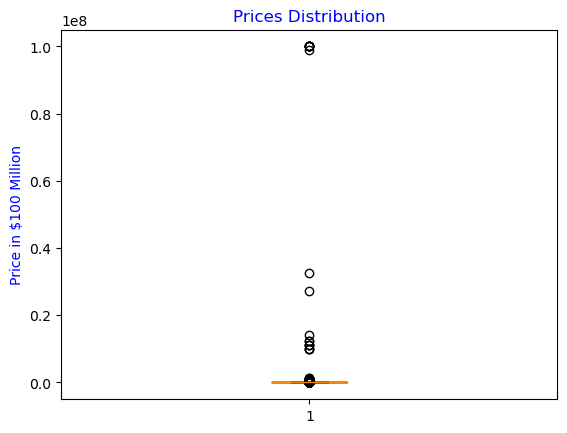

In [35]:
# Using box plot to see price distribution with outliers 
fig1, ax1 = plt.subplots()
ax1.set_title('Prices Distribution',color='b')
ax1.set_ylabel('Price in $100 Million',color='b')
ax1.boxplot(df['price'])
plt.show()

In [36]:
# Filtering out cars those priced for anything above $40,000 and filtering out cars those with $0 price tag 
# We pick cars price range to be some thing more reasonable so filter cars those below $300 and keep any thing below $40,000
df2 = df.loc[(df['price'] < 40*1000)&(df['price']>300),:]
df2.shape

(291050, 10)

In [37]:
df2['price'].min() #checking the minimum price

301

In [38]:
df2.head()

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,sedan,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,sedan,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,luxury,1995,3er,150000,benzin,bmw,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,convertable,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:39


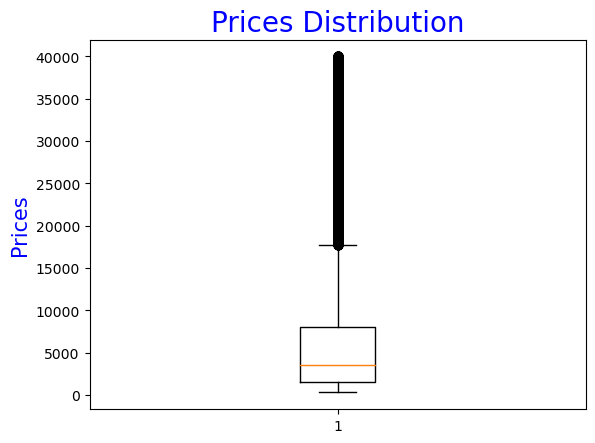

In [39]:
# Now this is how prices are distributed with median, upper quartile, lower quartile, upper bound, lower bound and outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Prices Distribution',fontsize= 20,color='b')
ax1.set_ylabel('Prices',fontsize= 15,color='b')
ax1.boxplot(df2['price'])
plt.savefig("./image/Price Distribution (box plot).png")
plt.show()

In [40]:
#Calculating upper,lower quartiles, upper,lower bounds,min,max,mean,median, and mode values of car prices
quartiles = df2['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of prices is: {lowerq}")
print(f"The upper quartile of prices is: {upperq}")
print(f"")
print(f"The interquartile range of prices is: {iqr}")
print(f"")
print(f"The the min of prices is: {df2['price'].min()}")
print(f"The the max of prices is: {df2['price'].max()}")
print(f"The the mean of prices is: {df2['price'].mean()}")
print(f"The the median of prices is: {quartiles[0.5]} ")
print(f"The the mode of prices is: {df2['price'].mode()}")
print(f"")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of prices is: 1500.0
The upper quartile of prices is: 8000.0

The interquartile range of prices is: 6500.0

The the min of prices is: 301
The the max of prices is: 39999
The the mean of prices is: 6041.802463494245
The the median of prices is: 3600.0 
The the mode of prices is: 0    1500
Name: price, dtype: int64

Values below -8250.0 could be outliers.
Values above 17750.0 could be outliers.


In [41]:
# Number of car prices those are outliers
outlier_count = df2.loc[df2['price'] > upper_bound, :].count()
outlier_count['price']

19371

In [42]:
# Print the number of outlier prices
print(f"Number of cars with outliers prices is  {outlier_count['price']} ")

Number of cars with outliers prices is  19371 


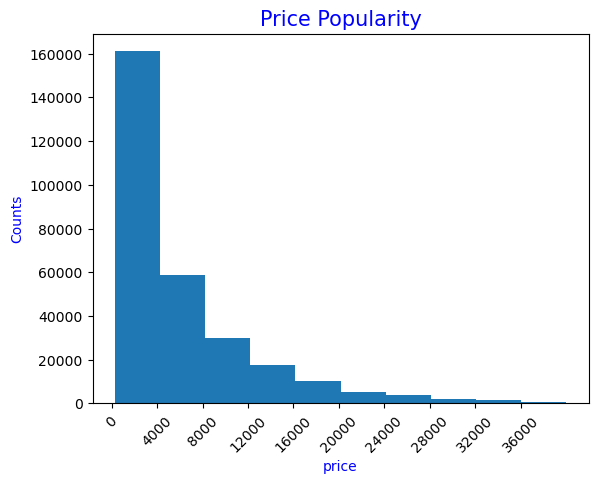

NormaltestResult(statistic=1946.191126492954, pvalue=0.0)
NormaltestResult(statistic=39782.92223379504, pvalue=0.0)


In [43]:
# Determine if the auto prices are normally distributed using a small and large sample size. 
#Also showing which prices are the most purchased in car market
plt.hist(df2['price'])
plt.title('Price Popularity',fontsize=15,color='b')
plt.xlabel('price',color='b')
plt.ylabel('Counts',color='b')
plt.xticks(np.arange(0,40000,4000),rotation=45)
plt.savefig("./image/Price Popularity (hist plot).png")
plt.show()
print(st.normaltest(df2['price'].sample(5000)))
print(st.normaltest(df2['price'].sample(100000)))

So pvalue is below 0.05 therefore its not normal they're different and we reject null hypothesis and its alternate hypothsis

## Using price range, what is the median selling price for each car type?
###      -   Creating Bins
###      -   Number of Sales to Price

In [44]:
# converting df2 into dataframe to avoid error in next step
df2 = pd.DataFrame(df2)

In [45]:
# Bins
bins = [0, 1500, 3000, 4500, 6000, 7500, float('inf')]
labels = ['<1500', '1500-3000', '3000-4500', '4500-6000', '6000-7500', '7500+']

# Assign range as per bins on price column. 
# Group by vehicleType & priceRange. Number of sales, typical selling price/each group. 
df2['priceRange'] = pd.cut(df2['price'], bins=bins, labels=labels) # range stored in priceRange.
df2['priceRange']

0             7500+
1             <1500
2         3000-4500
3             <1500
4         1500-3000
            ...    
307117        <1500
307118        <1500
307119        7500+
307120    3000-4500
307121        7500+
Name: priceRange, Length: 291050, dtype: category
Categories (6, object): ['<1500' < '1500-3000' < '3000-4500' < '4500-6000' < '6000-7500' < '7500+']

In [46]:
# grouping by price range
category_df = df2.groupby(['vehicleType', 'priceRange']).agg({'price': ['count', 'median']}).reset_index()
#renaming for clarity
category_df.columns =  ['vehicleType', 'priceRange', 'salesCount', 'medianPrice']

category_df.head(10)

,vehicleType,priceRange,salesCount,medianPrice
0,bus,<1500,3833,1000.0
1,bus,1500-3000,5434,2350.0
2,bus,3000-4500,4334,3800.0
3,bus,4500-6000,3461,5300.0
4,bus,6000-7500,2363,6899.0
5,bus,7500+,8240,12000.0
6,convertable,<1500,1686,1000.0
7,convertable,1500-3000,3046,2400.0
8,convertable,3000-4500,2766,3800.0
9,convertable,4500-6000,2179,5400.0


---------------------------------

## Visualizing Sales Count to Median Price per Car Type

In [47]:
#Assigning x_axis values to be charted
x_axis = category_df['vehicleType']
x_axis.head(3)

0    bus
1    bus
2    bus
Name: vehicleType, dtype: object

In [48]:
#Assigning y_axis values to be charted
y_axis = category_df['salesCount']
y_axis.head(3)

0    3833
1    5434
2    4334
Name: salesCount, dtype: int64

In [49]:
# Labels need to be integers not obj(string)
labels2 = [1500,3000,4500,6000,7500,40000]
color_range = list(labels2)
color_range

[1500, 3000, 4500, 6000, 7500, 40000]

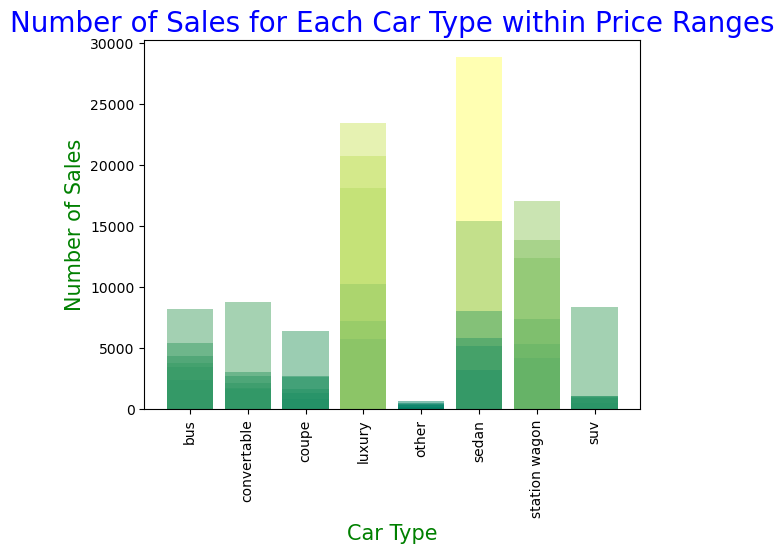

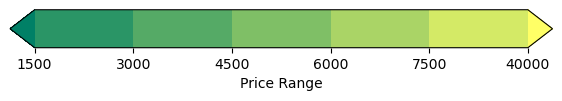

In [50]:
# Bar plot for sales to price 

fig = plt.figure()
my_cmap = plt.colormaps.get_cmap('summer')
rescale = lambda y: (y_axis - min(y_axis)) / (max(y_axis) - min(y_axis))
plt.bar(x_axis, y_axis, color=my_cmap(rescale(y_axis)), alpha = .5)
plt.title('Number of Sales for Each Car Type within Price Ranges',fontsize=20,color='b')
plt.xlabel('Car Type',fontsize=15,color='g')
plt.ylabel('Number of Sales',fontsize=15,color='g')
plt.xticks(rotation = "vertical")
plt.savefig("./image/Number of Sales for Each Car Type within Price Ranges1.png")
fig, ax = plt.subplots(figsize=(7, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.cm.summer
bounds = color_range
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Price Range")

plt.savefig("./image/Number of Sales for Each Car Type within Price Ranges2.png")
plt.show()


---------------------

## - What is the least and most popular car type being sold?
## - Using date of registration, which model year is most purchased.

In [51]:
# Storing "group by vehicleType" and its count for each vehicleType in vehTypeCount
veh_Type_Count = df2['vehicleType'].value_counts() # vehicleType: the index & counts: the values
veh_Type_Count

luxury           85518
sedan            66612
station wagon    60130
bus              27665
convertable      20161
coupe            15671
suv              12937
other             2356
Name: vehicleType, dtype: int64

In [52]:
veh_Type_Count.dtypes

dtype('int64')

In [53]:
# Most & least popular vehicle
most_popular = veh_Type_Count.idxmax()
most_popular

'luxury'

In [54]:
least_popular = veh_Type_Count.idxmin()
least_popular

'other'

In [55]:
# Model year most purchased based on the date of registration
# convert to numeric
df2['yearOfRegistration'] = pd.to_numeric(df2['yearOfRegistration'], errors='coerce')

# Counting each model year in the market
year_counts = df2['yearOfRegistration'].value_counts() 
year_counts

2006    18665
1999    18652
2005    18380
2004    18284
2003    18226
        ...  
1934        1
1935        1
1928        1
1927        1
1939        1
Name: yearOfRegistration, Length: 91, dtype: int64

In [56]:
# Printing the least and most popular car types and the most purchased model year
most_purchased_model = year_counts.idxmax()

print("Least popular car type: ", least_popular)
print("Most popular car type: ", most_popular)
print("Most purchased model year: ", most_purchased_model)

Least popular car type:  other
Most popular car type:  luxury
Most purchased model year:  2006


#### Linregress Year of Registration to price to figure out price trend per model year

In [57]:
df2.head()

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen,priceRange
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:46,7500+
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,sedan,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:17,<1500
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,sedan,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:21,3000-4500
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,luxury,1995,3er,150000,benzin,bmw,2016-04-06 19:17:07,<1500
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,convertable,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:39,1500-3000


In [58]:
# Grouping by year of registration then averaging the price column
year_reg_mean = df2.groupby('yearOfRegistration')['price'].mean()
year_reg_mean

yearOfRegistration
1910     2175.000000
1923     8750.000000
1927    16500.000000
1928     9999.000000
1929    18133.333333
            ...     
2014    19717.630118
2015    21693.989116
2016    19933.396825
2017     4361.461538
2018     2766.666667
Name: price, Length: 91, dtype: float64

In [59]:
# Model year is indexed
x_values = year_reg_mean.index

In [60]:
# Assing y values for easier understanding
y_values = year_reg_mean

In [61]:
# Writing down equations to determine regression and the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

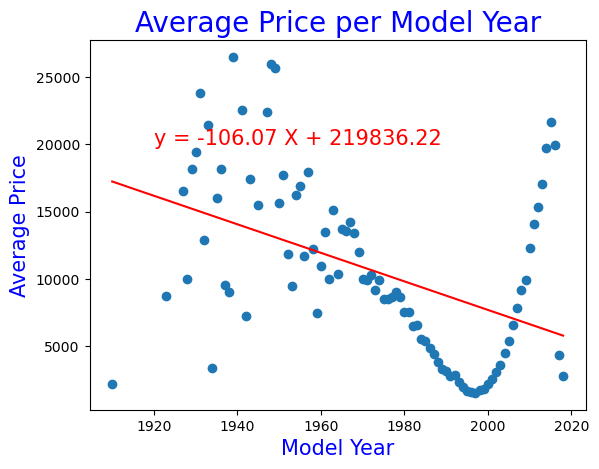

In [62]:
# Drawing price trend per model year
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + " X + " + str(round(intercept,2))
plt.annotate(line_eq,(1920,20000),fontsize=15,color="red")

plt.title('Average Price per Model Year',color='b',fontsize=20)
plt.xlabel('Model Year',color='b',fontsize=15)
plt.ylabel('Average Price',color='b',fontsize=15)

plt.savefig("./image/price trend per model year.png")

plt.show()

-------------------

## T test for Registration year per Price

 Whole population vs sample t test

In [63]:
# A new Data Frame to be easier for us
df3 = pd.DataFrame(df2[['yearOfRegistration','price']])
df3.head()

,yearOfRegistration,price
0,2004,9800
1,2001,1500
2,2008,3600
3,1995,650
4,2004,2200


In [64]:
# We assign the whole poplation
population = df3
population.head()

,yearOfRegistration,price
0,2004,9800
1,2001,1500
2,2008,3600
3,1995,650
4,2004,2200


In [65]:
df3['price'].mean()

6041.802463494245

In [66]:
# Finding the average price of the whole population
population.price.mean()

6041.802463494245

In [67]:
# Picking sample to be tested with the whole population; we pick here data related to 2006 as a sample
sample = df3[df3["yearOfRegistration"] == 2006]
sample.price.mean()

6602.8778998124835

In [68]:
# Calculate population and sample t-test
st.ttest_ind(population.price, sample.price, equal_var=False)

Ttest_indResult(statistic=-16.764944705223098, pvalue=9.82411170424585e-63)

##### According to *pvalue* so the whole population and the sample are *different* therefore null hypothesis is rejected

In [69]:
# Some data to test with
def gendata(population, sample):
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="Whole Population",alpha=0.2)
    plt.scatter(range(len(sample)), sample, label="2006",alpha=0.2)
    plt.legend()
    plt.title('T test and alternate hypothesis',color='b',fontsize=20)

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="Whole Population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="2006")
    
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='g', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    plt.savefig("./image/T test and null hypothesis.png")
    plt.show()
    

### Independent T-Tests

Independent t-tests will compare the means of 2 independent populations.

#### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is homogenous (The standard deviations are roughly equal)

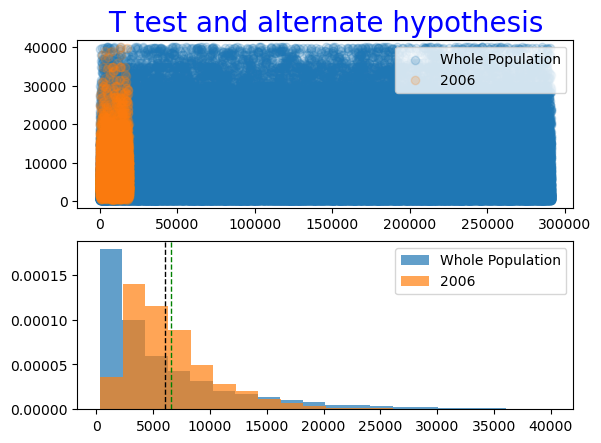

In [70]:
# Generate some data and show the scatter plot
gendata(population.price, sample.price)

In [71]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(population, sample, equal_var=False)

Ttest_indResult(statistic=array([-240.86744648,  -16.76494471]), pvalue=array([0.0000000e+00, 9.8241117e-63]))

In [72]:
# Run the t-test on the two population samples. 
st.ttest_ind(population.price, sample.price, equal_var=False)

Ttest_indResult(statistic=-16.764944705223098, pvalue=9.82411170424585e-63)

-------------------------------

## Visualizing Vehicle Type Count

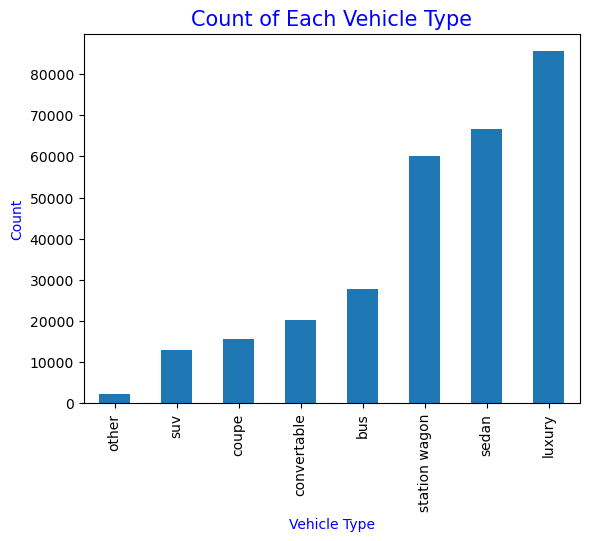

In [73]:
# Using bar plot 
veh_Type_Count.sort_values(ascending=True).plot.bar()
plt.xlabel('Vehicle Type',color='b')
plt.ylabel('Count',color='b')
plt.title('Count of Each Vehicle Type',fontsize=15,color='b')
plt.savefig("./image/Count of Each Vehicle Type.png")
plt.show()

-----------------------------------------------------------

##  How long does a car stay on the market? 
   #### - Type of car 

*offeringDate and lastSeen are the columns to be used to determine marketDuration*

In [74]:
# Convert columns to datetime
df2['offeringDate'] = pd.to_datetime(df2['offeringDate'])
df2['lastSeen'] = pd.to_datetime(df2['lastSeen'])

# Calculating duration
df2['marketDuration'] = df2['lastSeen'] - df2['offeringDate']

# Average duration group by car
mkt_Duration_By_Type_mean = df2.groupby('vehicleType')['marketDuration'].mean()

print(f"Car types stay on market on average {mkt_Duration_By_Type_mean.sort_values()}")

Car types stay on market on average vehicleType
sedan           8 days 09:04:26.946015732
bus             8 days 15:24:16.439436110
station wagon   8 days 15:41:36.746632296
luxury          8 days 19:47:35.993311349
other           8 days 20:48:36.631154499
suv             9 days 12:03:18.322022107
convertable     9 days 17:05:11.065274540
coupe           9 days 20:15:19.177333928
Name: marketDuration, dtype: timedelta64[ns]


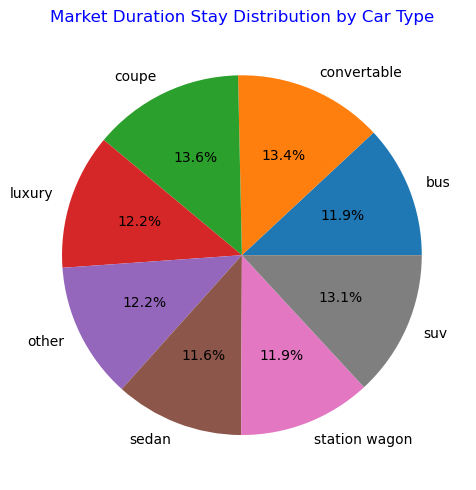

In [75]:
# Plotting a pie chart
plt.figure(figsize=(5,5))
plt.pie(mkt_Duration_By_Type_mean, labels=mkt_Duration_By_Type_mean.index, autopct='%1.1f%%')
plt.title('Market Duration Stay Distribution by Car Type',color='b')
plt.tight_layout()
plt.savefig("./image/Market Stay Duration Distribution by Car Type.png")
plt.show()
# there is almost similar distribution of market duration for different vehicle types. 

-------------------------------------------------

## How much does mileage affect the car price?

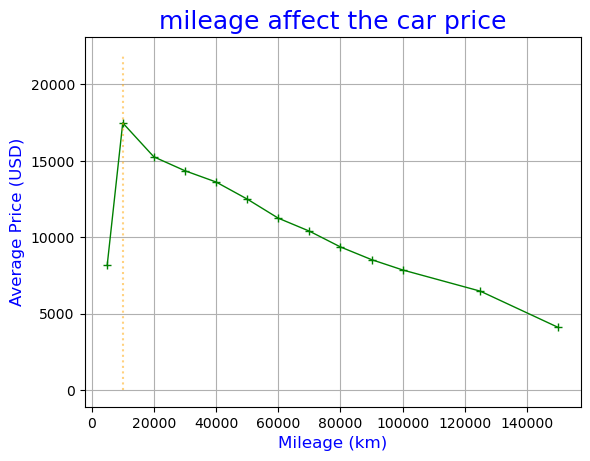

In [76]:
# group by kilometer and price. 
kilometer_grouped_df = df2.groupby('kilometer')['price'].mean()

# Mileage vs Average Price Visualized in Line Chart
plt.plot(kilometer_grouped_df,linewidth=1, marker='+',color='g')
plt.title('mileage affect the car price',fontsize=18,color='b')
plt.xlabel('Mileage (km)',fontsize=12,color='b')
plt.ylabel('Average Price (USD)',fontsize=12,color='b')
plt.vlines(10000,0,22000,alpha=0.5,color='orange',linestyle=':')
plt.grid()
plt.savefig("./image/mileage affect the car price.png")
plt.show()

----------------

## Number of Sales vs Mileage

In [77]:
# Counting how many prices for each mileage
mileage_Sales_Count = df2.groupby(['kilometer'])['price'].count()
mileage_Sales_Count

kilometer
5000        2726
10000       1353
20000       4315
30000       5000
40000       5516
50000       6610
60000       7576
70000       8487
80000       9550
90000      10734
100000     13029
125000     31713
150000    184441
Name: price, dtype: int64

In [78]:
# Assigning keys to x
x = mileage_Sales_Count.keys()
x

Int64Index([  5000,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
             80000,  90000, 100000, 125000, 150000],
           dtype='int64', name='kilometer')

In [79]:
# Assigning values to y
y = mileage_Sales_Count.values
y

array([  2726,   1353,   4315,   5000,   5516,   6610,   7576,   8487,
         9550,  10734,  13029,  31713, 184441])

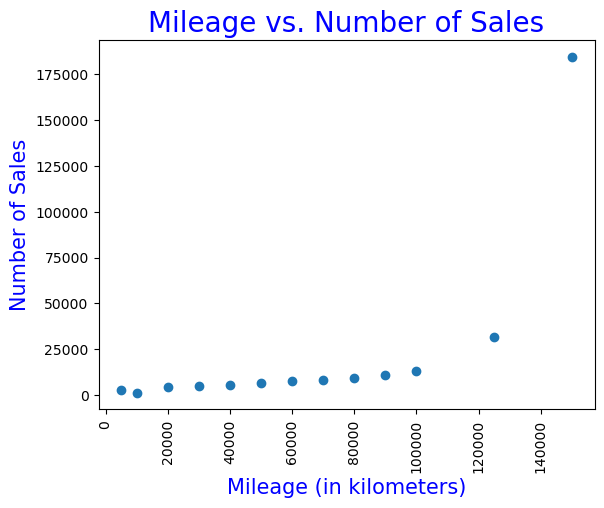

In [80]:
# Create a count plot to visualize the number of sales based on mileage
plt.scatter(x, y)

plt.xlabel('Mileage (in kilometers)',fontsize=15,color='b')
plt.ylabel('Number of Sales',fontsize=15,color='b')
plt.title('Mileage vs. Number of Sales',fontsize=20,color='b')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.savefig("./image/Mileage vs. Number of Sales.png")

plt.show()

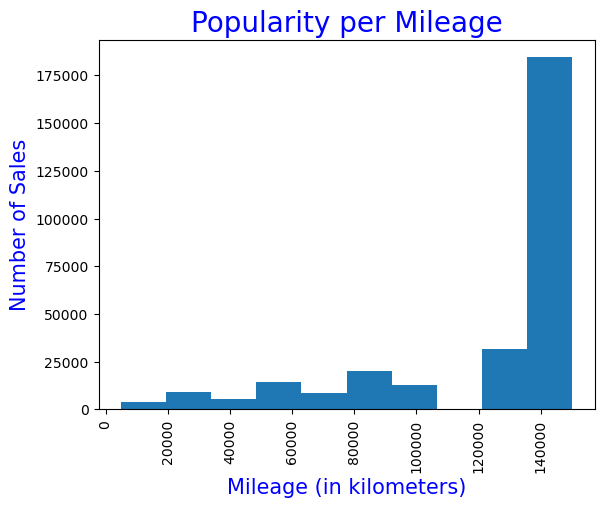

In [81]:
# With Histogram chart is better
plt.hist(df2['kilometer'])
plt.title('Popularity per Mileage',fontsize=15,color='b')
plt.xlabel('Mileage (in kilometers)',fontsize=15,color='b')
plt.ylabel('Number of Sales',fontsize=15,color='b')
plt.title('Popularity per Mileage',fontsize=20,color='b')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.savefig("./image/Popularity per Mileage.png")

plt.show()

In [82]:
vehicletypelist = list(category_df['vehicleType'].unique())

def getBinCount(my_vehicletype):
   
    fig,ax = plt.subplots()
    plt_veh = ax.bar(category_df.loc[category_df["vehicleType"] == my_vehicletype,:]['priceRange'],
    category_df.loc[category_df["vehicleType"] == my_vehicletype,:]['salesCount'],alpha = 0.5,color=["r","y","g","b","violet","gray"])
    plt.xticks(rotation=45)
    plt.xlabel("Price Category/Bins")
    plt.ylabel("Number of Sales")
    plt.title(f'{my_vehicletype} type : number of sales per bin')
    return

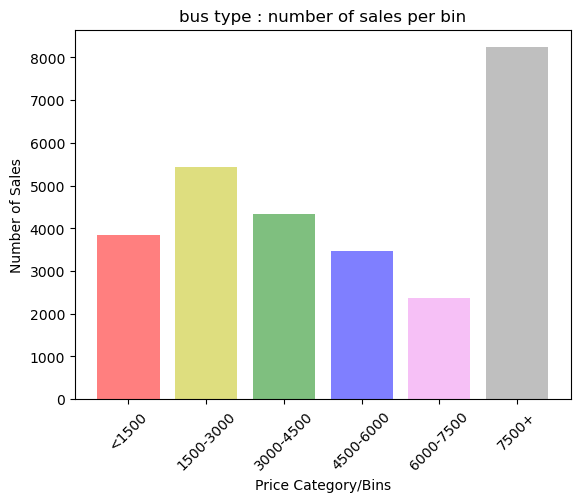

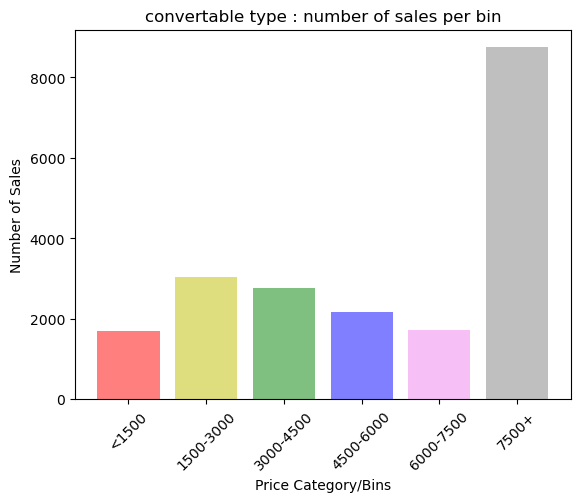

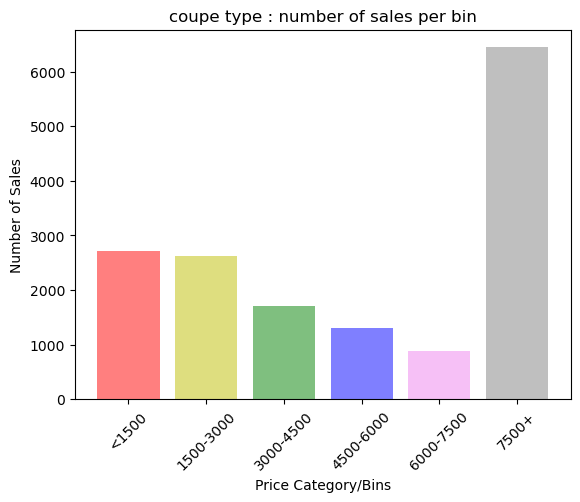

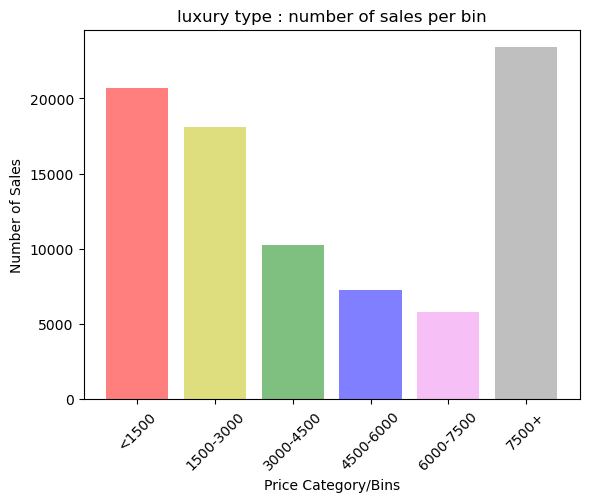

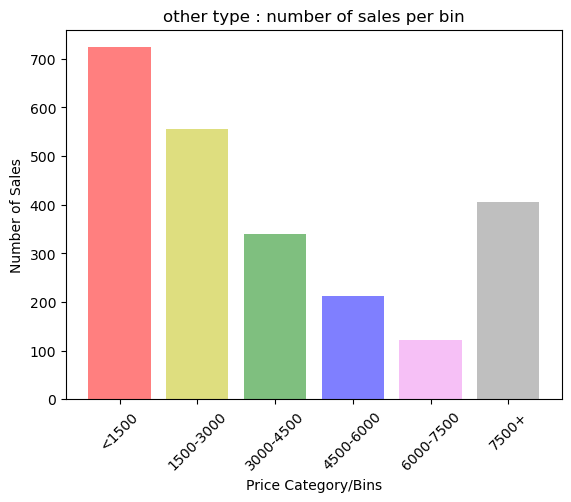

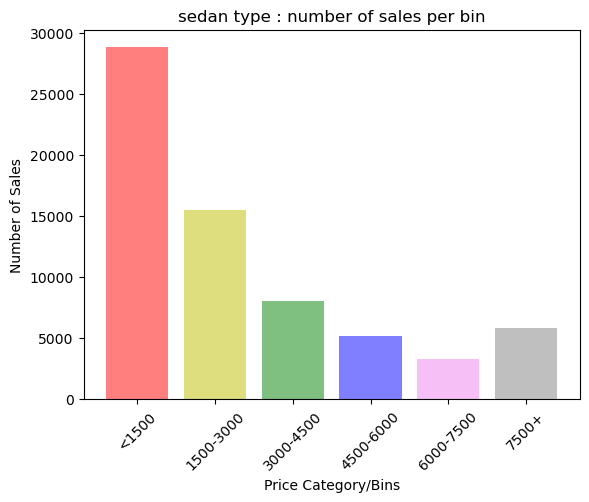

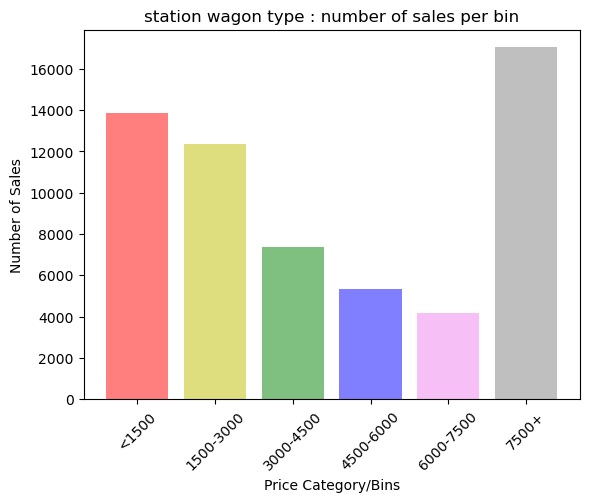

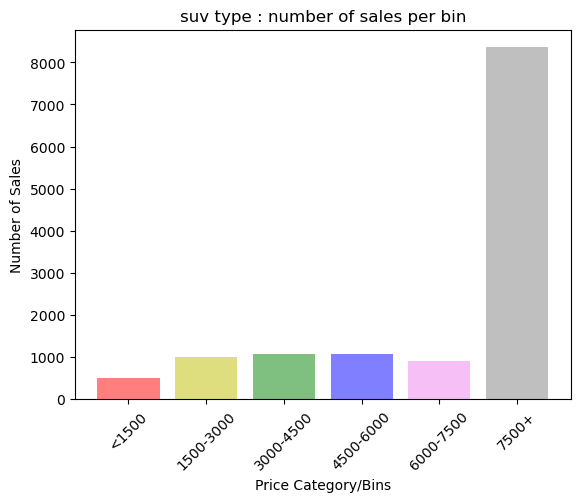

In [83]:
for vehicle in vehicletypelist:
    getBinCount(vehicle)

--